In [ ]:
Introduction About the Data :
The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

id : unique identifier of each diamond
carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
cut : Quality of Diamond Cut
color : Color of Diamond
clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
table : A diamond's table is the facet which can be seen when the stone is viewed face up.
x : Diamond X dimension
y : Diamond Y dimension
x : Diamond Z dimension
Target variable:

price: Price of the given Diamond.
Dataset Source Link : https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv

In [399]:
pip install ensemble

Note: you may need to restart the kernel to use updated packages.


In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [10]:
df = pd.read_csv("gemstone.csv")
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [12]:
# Check for Duplicated values
df.duplicated().sum()

0

In [13]:
# Check for null values
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [14]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [15]:
df.drop(["id"], axis = 1, inplace = True)

In [16]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [17]:
# Seggreagate numerical and Categorial columns
numerical_columns = df.columns[df.dtypes != 'object']
categorical_columns = df.columns[df.dtypes == 'object']
print('Numerical Columns:', numerical_columns)
print("categorical_columns:",categorical_columns)

Numerical Columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
categorical_columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [18]:
df[categorical_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [19]:
df[numerical_columns].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [20]:
df.cut.value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [21]:
df.color.value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [22]:
df.clarity.value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

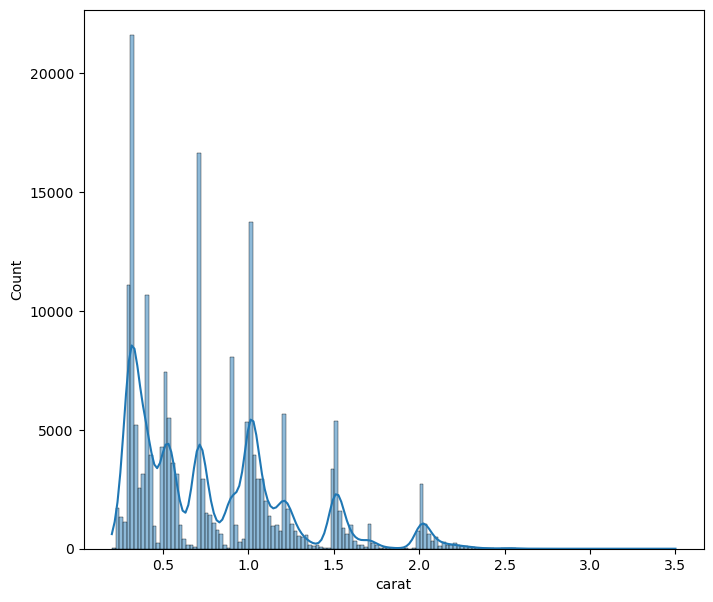

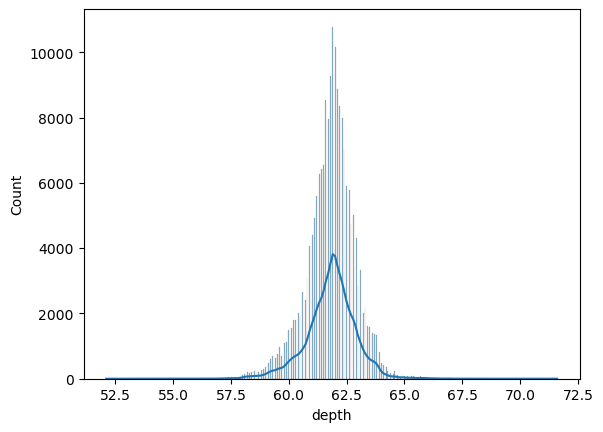

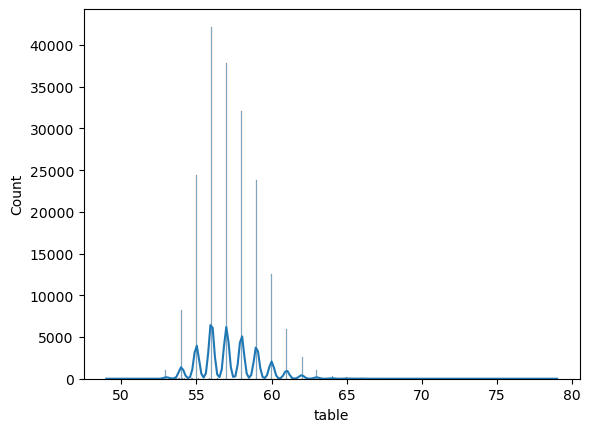

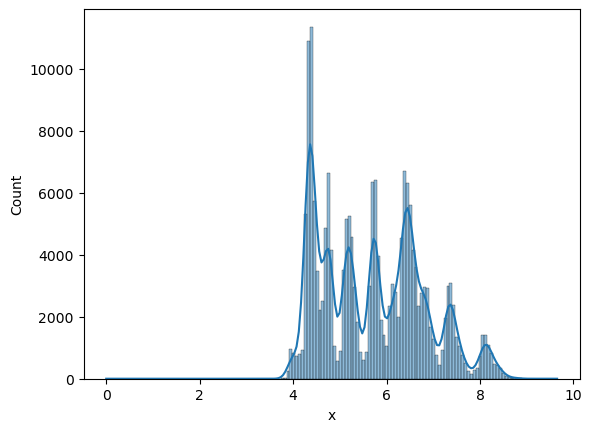

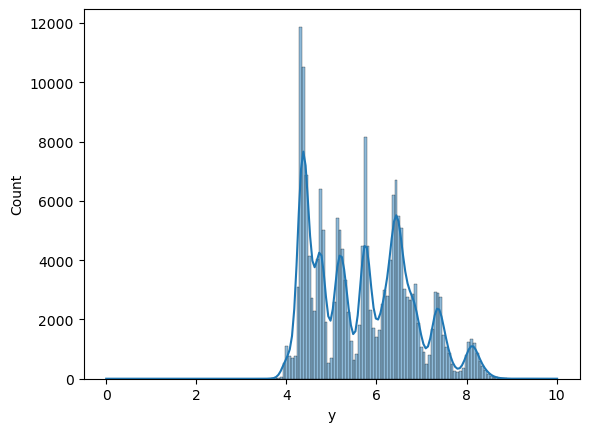

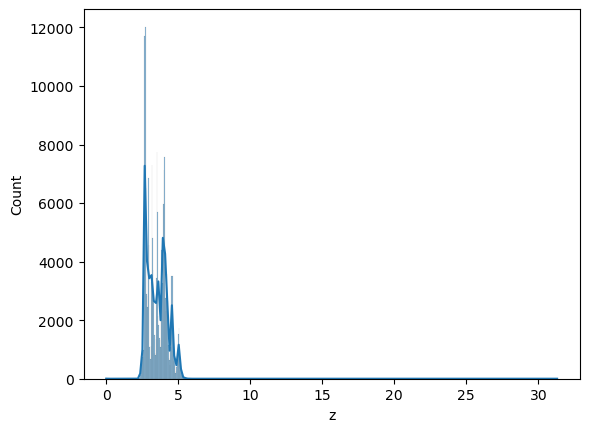

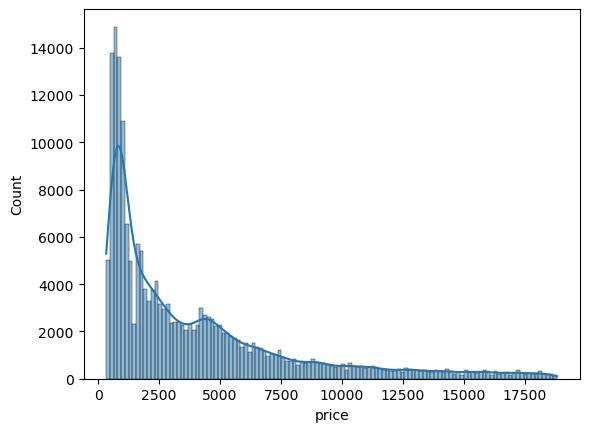

In [23]:
import seaborn as sns
plt.figure(figsize = (8,7))
x=0
for i in numerical_columns:
    sns.histplot(data = df, x = i, kde = True)
    print('\n')
    plt.show()

<Figure size 800x700 with 0 Axes>

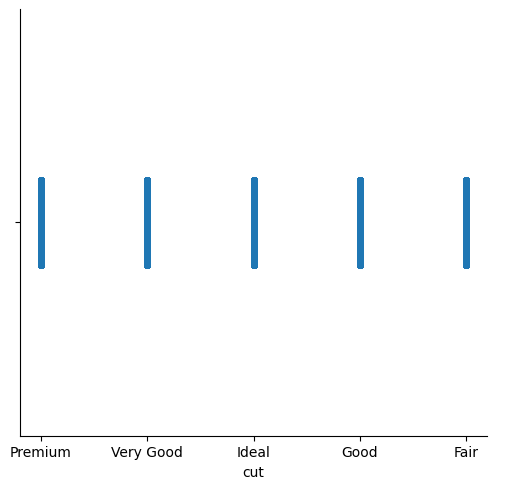

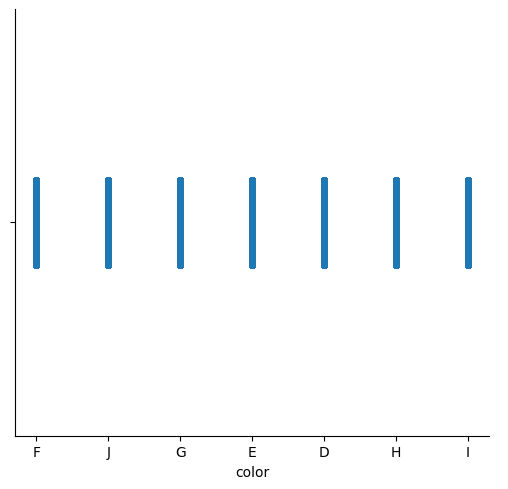

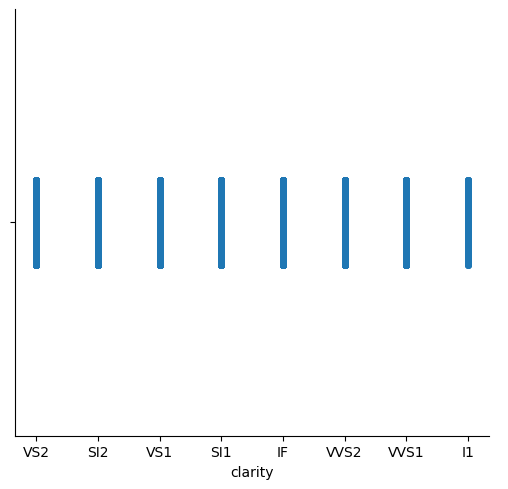

In [24]:
import seaborn as sns
plt.figure(figsize = (8,7))
x=0
for i in categorical_columns:
    sns.catplot(data = df, x = i)
    print('\n')
    plt.show()

<Axes: >

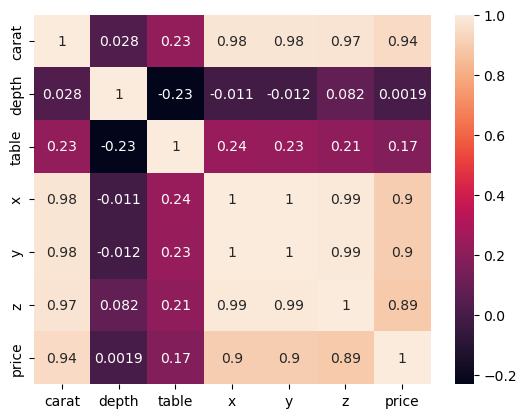

In [25]:
sns.heatmap(df[numerical_columns].corr(),annot=True)

In [26]:
##Currently we will not execute this
## df.drop(labels=['x','y','z'],axis=1

In [27]:
## For Domain Purpose https://www.americangemsociety.org/ags-diamond-grading-system/
df['cut'].unique() 

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [28]:
cut_map = {'Fair': 1, "Good":2,"Very Good": 3, "Premium":4,"Ideal":5}

In [29]:
df['color'].unique() 

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [30]:
color_map = {"D":7 ,"E":6 ,"F":5 , "G":4 ,"H":3 , "I":2, "J":1}

In [31]:
df['clarity'].unique() 

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [32]:
clarity_map = {"I1": 1 ,"SI2":2 ,"SI1":3 , "VS2":4 ,"VS1":5 , "VVS2":6, "VVS1":7, "IF":8}

In [33]:
#Mapping the values
df['cut']=df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [34]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,5,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,1,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


# Model Training

In [423]:
# Divide Dependent and Independent feature
x = df.drop("price", axis = 1)
y = df["price"]

In [425]:
x.shape, y.shape

((193573, 9), (193573,))

In [427]:
# Define colums which should be ordinal encoded and which should be scaled
categorical_cols = x.select_dtypes(include ='object').columns
numerical_cols = x.select_dtypes(exclude ='object').columns

In [429]:
#Define the custom ranking for each ordinal variable
cut_categories = {'Fair', "Good","Very Good", "Premium","Ideal"}
color_categories = {"D","E","F", "G" ,"H" , "I", "J"}
clarity_categories = {"I1" ,"SI2" ,"SI1" , "VS2" ,"VS1" , "VVS2", "VVS1", "IF"}

In [433]:
from sklearn.impute import SimpleImputer # Handling Missing values
from sklearn.preprocessing import StandardScaler # Handling feature scaling
from sklearn.preprocessing import OrdinalEncoder #Ordinal Encoding
#Pipelimne
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [435]:
# Numerical Pipeline
num_pipeline = Pipeline(steps = [
                                 ('imputer', SimpleImputer(strategy = "median")), 
                                 ('scaler',StandardScaler())
                                ])
# Categorical Pipeline
cat_pipeline = Pipeline(steps = [
                                 ('imputer',SimpleImputer(strategy = "most_frequent")), 
                                 ('ordinalEncoder',OrdinalEncoder(categories = [cut_categories,color_categories,clarity_categories])),
                                 ('scaler',StandardScaler())
                                ])

In [437]:
# Combine both the pipelines
preprocessor = ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)
    ])

In [439]:
# Train test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 1)

In [441]:
x_train = pd.DataFrame(preprocessor.fit_transform(x_train), columns = preprocessor.get_feature_names_out())
x_test = pd.DataFrame(preprocessor.transform(x_test), columns = preprocessor.get_feature_names_out()) 

In [45]:
# Model training

In [443]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import  XGBRegressor

In [445]:
def cross_validation(linear_reg_model, x, y, a):
    scores = cross_val_score(linear_reg_model, x, y, cv=a)
    return scores

In [260]:
def evaluate_models(y_test,y_pred):
    r2_square = r2_score(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    return r2_square,mae,mse,rmse

In [449]:
# Train Multiple Models
models = {
           "LinearRegression":LinearRegression(),
           "Lasso":Lasso(),
           "Ridge":Ridge(),
           "ElasticNet":ElasticNet(),
           "AdaBoostRegressor": AdaBoostRegressor(),
           "GradientBoostingRegressor": GradientBoostingRegressor(),
           "XGB_Regressor" :  XGBRegressor()
        }

model_list = []
r2_list = []

kf = KFold(n_splits = 5, shuffle=True, random_state=None) # CrossValidation Technique
cnt=0
print(f'Model Training Performance using K-Fold cross validation')

for train_index, test_index in kf.split(x,y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

for i in range(len(models)):
    model = list(models.values())[i]
    scores = cross_validation(model, x, y, kf)
    print(f'"Model Name" - {(list(models.keys())[i])}')
    print("="*35)
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("StandardDeviation:", scores.std())

    
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    r2_square,mae,mse,rmse = evaluate_models(y_test,y_pred) 

    #print(list(models.keys())[i])
    print("Model Evaluation")
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)
    print('='*35)
    print('\n')
    
    model_list.append(list(models.keys())[i])
    r2_list.append(r2_square*100)
    
print(f'Model name with highest accuracy is "{model_list[(r2_list.index(max(r2_list)))]}" with score of {round(max(r2_list),2)}')

print('='*35)
'''

print("HyperParameter Tuning")

from sklearn.model_selection import GridSearchCV

param = {'alpha' : [1.0, 2,5,9,15], 'fit_intercept' : [True,False]}
grid_search = GridSearchCV(estimator = Lasso(), param_grid = param, cv=10, verbose = 4, scoring = 'r2')
grid_search.fit(x_train, y_train)
grid_search.best_score_,grid_search.best_params_

print('='*35)
best_model = grid_search.best_estimator_
print(f'Best model After HyperTuning is  -> {best_model}')

print('='*35)
print("Predicting with best model")
y_pred = best_model.predict(x_test)
print("Test accuracy")
test_score = r2_score(y_test,y_pred)
print(test_score)
'''

Model Training Performance using K-Fold cross validation
Fold:0, Train set: 154858, Test set:38715
Fold:1, Train set: 154858, Test set:38715
Fold:2, Train set: 154858, Test set:38715
Fold:3, Train set: 154859, Test set:38714
Fold:4, Train set: 154859, Test set:38714
"Model Name" - LinearRegression
Scores: [0.93699365 0.93607317 0.93492053 0.93803454 0.93708054]
Mean: 0.9366204886331275
StandardDeviation: 0.0010526020770452375
Model Evaluation
RMSE: 1016.0525897851642
MAE: 674.2413949361344
R2 score 93.65757026885092


"Model Name" - Lasso
Scores: [0.93635379 0.93569397 0.93644536 0.93747482 0.93740251]
Mean: 0.9366740901293916
StandardDeviation: 0.0006763598866566464
Model Evaluation
RMSE: 1013.5223932419452
MAE: 675.0475154461899
R2 score 93.68911905462582


"Model Name" - Ridge
Scores: [0.93758943 0.9362797  0.9380711  0.93633683 0.93483818]
Mean: 0.9366230482218627
StandardDeviation: 0.0011328104452674934
Model Evaluation
RMSE: 1016.079249364033
MAE: 674.2676479151106
R2 score 93.65

'\n\nprint("HyperParameter Tuning")\n\nfrom sklearn.model_selection import GridSearchCV\n\nparam = {\'alpha\' : [1.0, 2,5,9,15], \'fit_intercept\' : [True,False]}\ngrid_search = GridSearchCV(estimator = Lasso(), param_grid = param, cv=10, verbose = 4, scoring = \'r2\')\ngrid_search.fit(x_train, y_train)\ngrid_search.best_score_,grid_search.best_params_\n\nprint(\'=\'*35)\nbest_model = grid_search.best_estimator_\nprint(f\'Best model After HyperTuning is  -> {best_model}\')\n\nprint(\'=\'*35)\nprint("Predicting with best model")\ny_pred = best_model.predict(x_test)\nprint("Test accuracy")\ntest_score = r2_score(y_test,y_pred)\nprint(test_score)\n'

# VIF

In [105]:
vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
vif

,Feature,VIF
0,carat,249.044653
1,cut,22.336540
2,color,11.736062
3,clarity,13.340132
4,depth,1048.129570
5,table,885.540089
6,x,17028.250928
7,y,15877.454414
8,z,1883.429363
9,price,30.804867


In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame() #Create Empty Dataframe
vif['Feature'] = df.columns
vif

,Feature
0,carat
1,cut
2,color
3,clarity
4,depth
5,table
6,x
7,y
8,z
9,price


In [113]:
df1 = df.copy()
df1.drop("x", axis=1, inplace = True)
df1

,carat,cut,color,clarity,depth,table,y,z,price
0,1.52,4,5,4,62.2,58.0,7.33,4.55,13619
1,2.03,3,1,2,62.0,58.0,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...
193568,0.31,5,7,6,61.1,56.0,4.39,2.67,1130
193569,0.70,4,4,6,60.3,58.0,5.77,3.47,2874
193570,0.73,3,5,3,63.1,57.0,5.75,3.62,3036
193571,0.34,3,7,3,62.9,55.0,4.49,2.81,681


In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame() #Create Empty Dataframe
vif['Feature'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(len(df1.columns))]
vif

,Feature,VIF
0,carat,243.947843
1,cut,21.954518
2,color,11.723214
3,clarity,13.337950
4,depth,1027.243879
5,table,848.564698
6,y,2116.989814
7,z,1798.303048
8,price,30.666378


In [117]:
df1.drop("y", axis=1, inplace = True)
df1

,carat,cut,color,clarity,depth,table,z,price
0,1.52,4,5,4,62.2,58.0,4.55,13619
1,2.03,3,1,2,62.0,58.0,5.05,13387
2,0.70,5,4,5,61.2,57.0,3.50,2772
3,0.32,5,4,5,61.6,56.0,2.71,666
4,1.70,4,4,4,62.6,59.0,4.77,14453
...,...,...,...,...,...,...,...,...
193568,0.31,5,7,6,61.1,56.0,2.67,1130
193569,0.70,4,4,6,60.3,58.0,3.47,2874
193570,0.73,3,5,3,63.1,57.0,3.62,3036
193571,0.34,3,7,3,62.9,55.0,2.81,681


In [119]:
vif = pd.DataFrame() #Create Empty Dataframe
vif['Feature'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(len(df1.columns))]
vif

,Feature,VIF
0,carat,210.960651
1,cut,19.370912
2,color,11.566128
3,clarity,13.258373
4,depth,955.727490
5,table,650.253324
6,z,666.334199
7,price,29.871715


In [121]:
df1.drop("depth", axis=1, inplace = True)
df1

,carat,cut,color,clarity,table,z,price
0,1.52,4,5,4,58.0,4.55,13619
1,2.03,3,1,2,58.0,5.05,13387
2,0.70,5,4,5,57.0,3.50,2772
3,0.32,5,4,5,56.0,2.71,666
4,1.70,4,4,4,59.0,4.77,14453
...,...,...,...,...,...,...,...
193568,0.31,5,7,6,56.0,2.67,1130
193569,0.70,4,4,6,58.0,3.47,2874
193570,0.73,3,5,3,57.0,3.62,3036
193571,0.34,3,7,3,55.0,2.81,681


In [123]:
vif = pd.DataFrame() #Create Empty Dataframe
vif['Feature'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(len(df1.columns))]
vif

,Feature,VIF
0,carat,183.880350
1,cut,17.745245
2,color,11.563727
3,clarity,13.072491
4,table,216.354109
5,z,500.506544
6,price,29.760814


# RFE

In [379]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator = LinearRegression(), n_features_to_select = None)

In [381]:
x_train.columns

Index(['num_pipeline__carat', 'num_pipeline__cut', 'num_pipeline__color',
       'num_pipeline__clarity', 'num_pipeline__depth', 'num_pipeline__table',
       'num_pipeline__x', 'num_pipeline__y', 'num_pipeline__z'],
      dtype='object')

In [383]:
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression())

In [385]:
y_pred = rfe.predict(x_test)

In [387]:
rfe.support_

array([ True, False, False,  True, False, False,  True, False,  True])

In [389]:
r2_score(y_test,y_pred)

0.9199187905118611

In [391]:
rfe.ranking_

array([1, 3, 2, 1, 4, 6, 1, 5, 1])

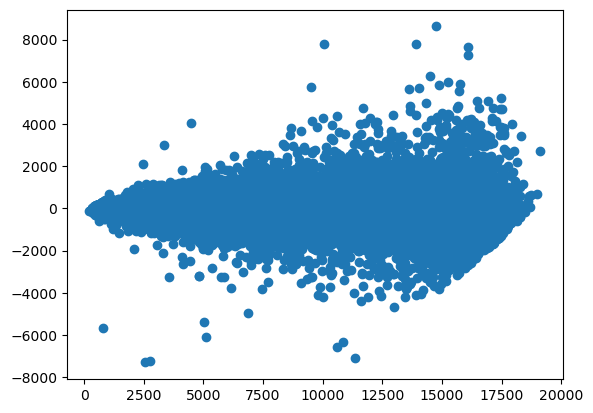

In [451]:
error = y_pred - y_test
plt.scatter(y_pred, error)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12404\240479549.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


<Axes: xlabel='price', ylabel='Density'>

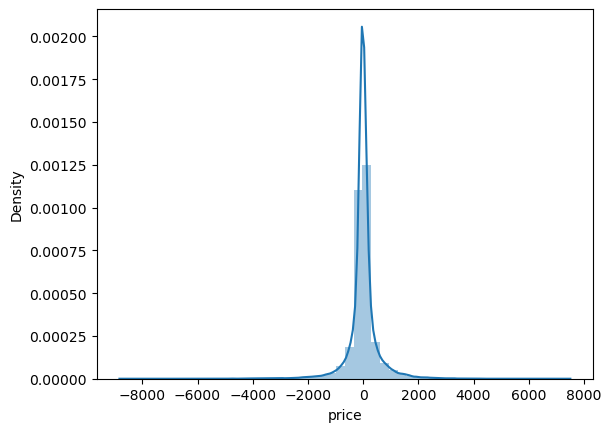

In [453]:
error = y_test - y_pred
sns.distplot(error)

In [ ]:
sns.pairplot(data = df)

KeyboardInterrupt: 